# Necessary imports

In [ ]:
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from PIL import Image
import random
from IPython.display import display

# Load Dataset

In [ ]:
drive.mount('/content/gdrive')
# Replace with link/path to dataset (I, my case, I uploaded the dataset on my Drive)
zip_file_path = "/content/gdrive/MyDrive/dataset/images_dataset.zip"
extracted_folder_path = '/content/dataset'
# Unzip the file using the command line
!unzip "$zip_file_path" -d "$extracted_folder_path"

Mounted at /content/gdrive
Archive:  /content/gdrive/MyDrive/dataset/images_dataset.zip
   creating: /content/dataset/images/
   creating: /content/dataset/images/data/
   creating: /content/dataset/images/data/bike/
  inflating: /content/dataset/images/data/bike/bike_001.bmp  
  inflating: /content/dataset/images/data/bike/bike_002.bmp  
  inflating: /content/dataset/images/data/bike/bike_003.bmp  
  inflating: /content/dataset/images/data/bike/bike_004.bmp  
  inflating: /content/dataset/images/data/bike/bike_005.bmp  
  inflating: /content/dataset/images/data/bike/bike_006.bmp  
  inflating: /content/dataset/images/data/bike/bike_007.bmp  
  inflating: /content/dataset/images/data/bike/bike_008.bmp  
  inflating: /content/dataset/images/data/bike/bike_009.bmp  
  inflating: /content/dataset/images/data/bike/bike_010.bmp  
  inflating: /content/dataset/images/data/bike/bike_011.bmp  
  inflating: /content/dataset/images/data/bike/bike_012.bmp  
  inflating: /content/dataset/images/da

# Data Analysis

The dataset is composed of multiple images of different things that are scattered accross multiple folders:


*   Bikes
*   Cats
*   Dogs
*   Humans
*   Cars
*   Horses
*   Flowers



## Categories

In this section, we aim to analyze the distributions of our dataset across different categories.

In [ ]:
folders_categories = extracted_folder_path + '/images/data'

In [ ]:
def count_files_in_folders(directory):
    category_dict = {}
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)

        if os.path.isdir(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            category_dict[folder] = file_count
    return category_dict

category_dict = count_files_in_folders(folders_categories)

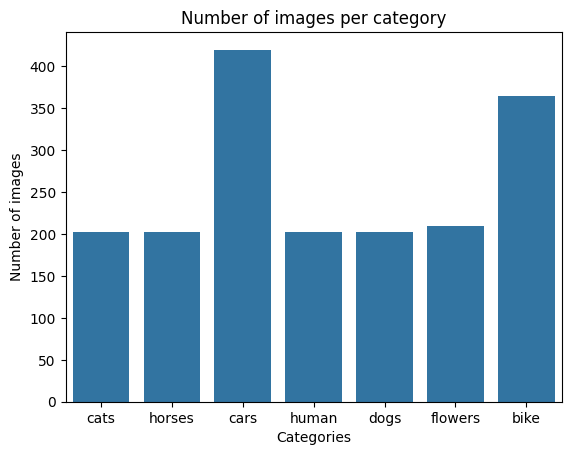

In [ ]:
# Create a bar plot
sns.barplot(x=category_dict.keys(), y=category_dict.values())

# Set theme
sns.set_theme(style="darkgrid")

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of images')
plt.title('Number of images per category')

# Show the plot
plt.show()

The dataset exhibits diversity, encompassing images featuring bikes, dogs, humans, horses, cats, cars, and flowers, with remarkable variations in distribution as illustrated by the bar plot: Most of them are images of cars and bikes.


In [ ]:
def merge_folders(source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through each file in the source folder
    for item in os.listdir(source_folder):
        source_item = os.path.join(source_folder, item)
        destination_item = os.path.join(destination_folder, item)

        # Copy each file inside the destination folder
        shutil.copy2(source_item, destination_item)

# Get path to the list of category folders
source_folders = []
for folder in os.listdir(folders_categories):
  source_folders.append(folders_categories + '/' + folder)

# Merge contents of multiple folders into a single folder
destination_folder = "/content/merged_dataset"
for source_folder in source_folders:
    merge_folders(source_folder, destination_folder)

# Extensions

In the following section, we will delve into an examination of the distribution of our images according to their respective file extensions.

In [ ]:
def count_file_extensions(folder_path):
    extension_dict = {}
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            _, file_extension = os.path.splitext(file)
            if file_extension:
                extension_dict[file_extension] = extension_dict.get(file_extension, 0) + 1
    return extension_dict

extension_dict = count_file_extensions(destination_folder)

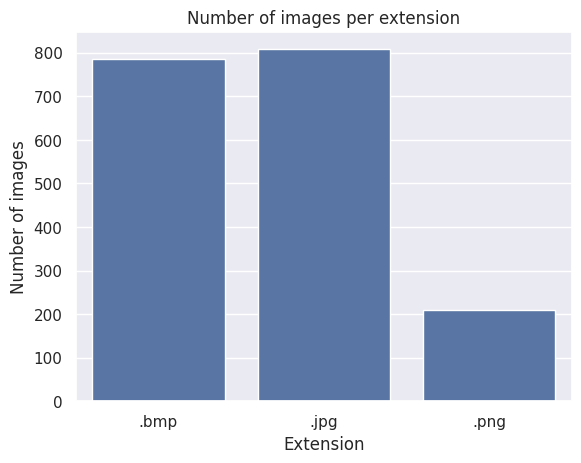

In [ ]:
# Create a bar plot
sns.barplot(x=extension_dict.keys(), y=extension_dict.values())

# Set theme
sns.set_theme(style="darkgrid")

# Add labels and title
plt.xlabel('Extension')
plt.ylabel('Number of images')
plt.title('Number of images per extension')

# Show the plot
plt.show()

The dataset includes images with three distinct file extensions: .PNG, .BMP, and .JPG. The .BMP and .JPG formats are more prevalent among these images.

## Dimensions

The following section aims to analyze the distribution of our images concerning their respective dimensions, encompassing both heights and widths.

In [ ]:
def get_image_dimensions(folder_path):
    heights = []
    widths = []
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
                # Open the image and get its dimensions
                with Image.open(file_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
        except Exception as e:
                print(f"Error processing {filename}: {str(e)}")

    return widths, heights

# Get height and width of each image inside the destination folder
widths, heights = get_image_dimensions(destination_folder)

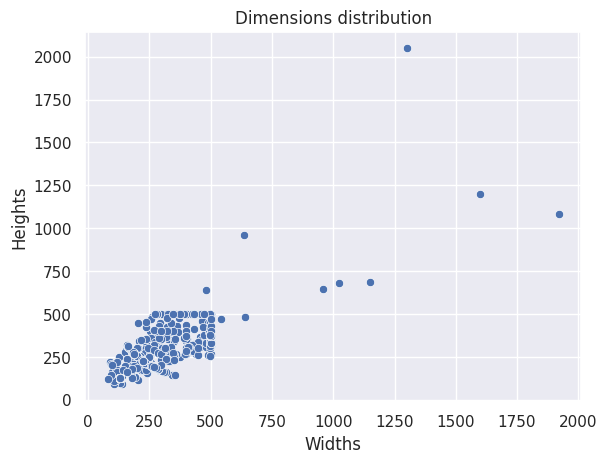

In [ ]:
# Create a scatter plot using Seaborn
sns.scatterplot(x=widths, y=heights)

# Optionally, you can set labels for the axes
plt.xlabel('Widths')
plt.ylabel('Heights')
plt.title('Dimensions distribution')

# Show the plot
plt.show()

Most of our dataset images are smaller than 500 pixels in both height and width, as indicated in the scatter plot.



## Examples

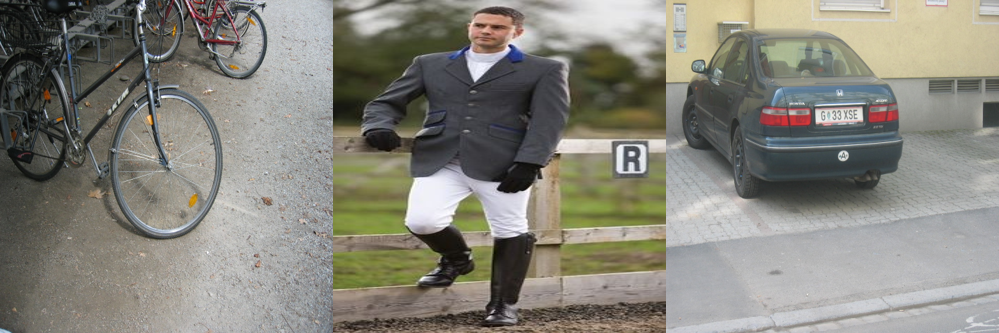

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display

def resize_image(image, target_size):
    return image.resize(target_size)

def display_random_images(folder, num_images_to_display, target_size=(200, 200)):
    # Get the list of all files in the folder
    image_files = os.listdir(folder)

    # Select random images
    selected_images = random.sample(image_files, num_images_to_display)

    # Resize images to a common size
    resized_images = []
    for img_name in selected_images:
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        target_size = int(total_size/num_images_to_display), int(total_size/num_images_to_display)
        img = resize_image(img, target_size)
        resized_images.append(img)

    # Display images horizontally using PIL
    widths, heights = zip(*(i.size for i in resized_images))
    total_width = sum(widths)

    # Create a blank image with the total width
    collage = Image.new('RGB', (total_width, int(total_size/num_images_to_display)))

    # Paste resized images into the collage
    current_width = 0
    for img in resized_images:
        collage.paste(img, (current_width, 0))
        current_width += img.width

    # Display the collage
    display(collage)

num_images_to_display = 3
total_size = 1000
display_random_images(destination_folder, num_images_to_display, total_size)

Here are a few representative samples from our dataset, featuring a bike, a human and a car.